### [The Framingham Heart Study: Decision Trees](https://medium.com/swlh/the-framingham-heart-study-decision-trees-83a7fb62718e)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
#matplotlib.style.use('ggplot')
sns.set_theme(style="darkgrid")
%matplotlib inline

In [2]:
# Creating the data frame
framingham = pd.read_csv('datasets/framingham.csv')
framingham.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

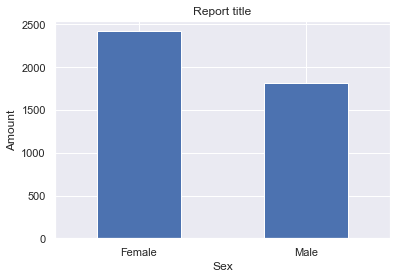

In [3]:
ax = framingham.male.value_counts().plot(kind='bar', rot=0)
ax.set_xlabel('Sex')
ax.set_ylabel('Amount')
ax.set_title('Report title')
#plt.xticks((0, 1), ('Female', 'Male'))
ax.set_xticklabels(('Female', 'Male'))

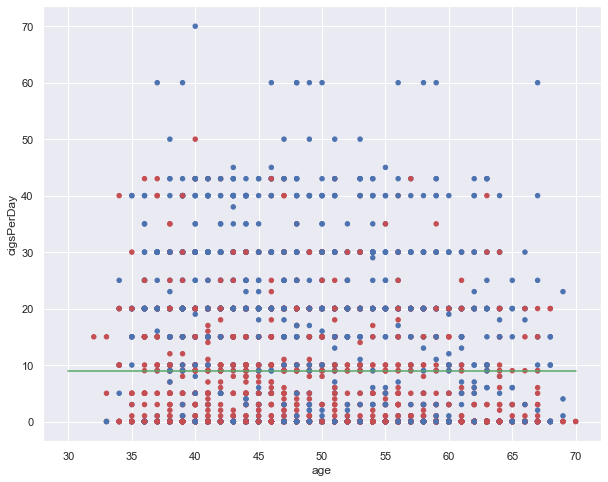

In [7]:
mean = framingham.cigsPerDay.mean()
col = framingham.male.map({0:'r', 1:'b'})
ax = framingham[['male', 'age', 'cigsPerDay']].plot(kind='scatter', x='age', y='cigsPerDay', c=col, figsize=(10,8))
plt.plot([30, 70.0], [mean, mean], 'k-', color = 'g')

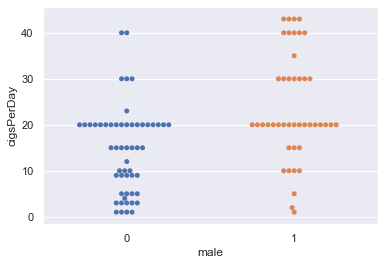

In [8]:
sns.swarmplot(x="male", y="cigsPerDay", data=framingham[framingham['currentSmoker']==1][['male','cigsPerDay']].head(100))

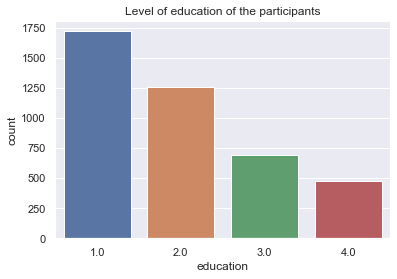

In [9]:
ax = sns.countplot(x='education',data=framingham).set_title('Level of education of the participants')

Text(0.5, 0.98, 'Current smoker')

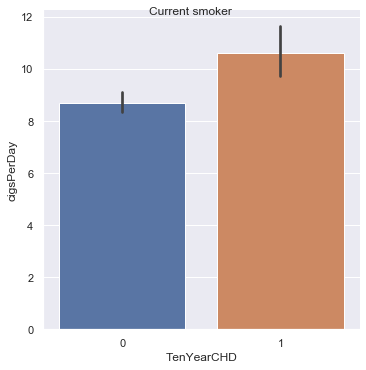

In [10]:
ax = sns.catplot(x='TenYearCHD', y='cigsPerDay', kind='bar', data=framingham)
ax.fig.suptitle('Current smoker')

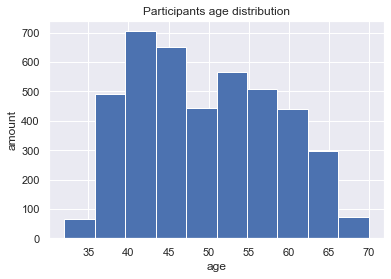

In [11]:
plt.hist(x=framingham['age'], bins=10)
# Add title and axis names
plt.title('Participants age distribution')
plt.xlabel('age')
plt.ylabel('amount')
plt.show()

Try to see if there is a relationship between age and the ten year risk of CHD and sorted by the smoker category.

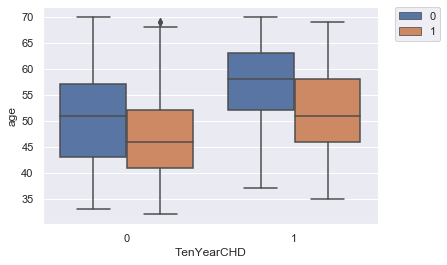

In [12]:
sns.boxplot(x='TenYearCHD', y='age', hue='currentSmoker', data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Take a look at the relationship between age, prevalent stroke, and the ten year risk of developing CHD.

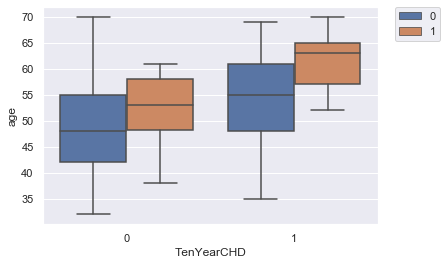

In [13]:
sns.boxplot(x='TenYearCHD', y='age', hue='prevalentStroke', data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Take a look at the variables age, diabetes, and ten year risk of developing CHD.

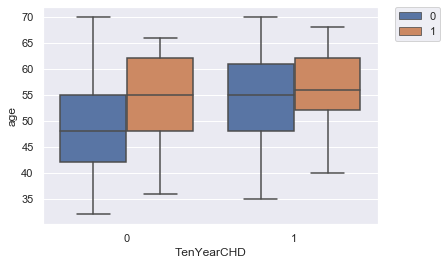

In [14]:
sns.boxplot(x='TenYearCHD', y='age', hue='diabetes', data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Take a look at total cholesterol levels.  In the year 1961, an increase in cholesterol levels was found to increase the risk of CHD.

(80, 725.45)

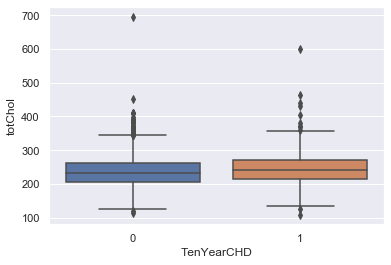

In [15]:
sns.boxplot(x='TenYearCHD', y='totChol', data=framingham)
plt.ylim(80)

Take a look at both systolic and diastolic blood pressure, and visualize their relationship with ten year CHD risk.

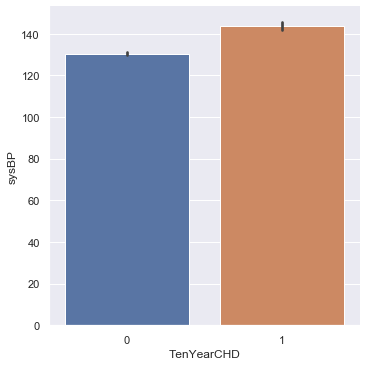

In [16]:
sns.catplot(x='TenYearCHD', y='sysBP', kind='bar', data=framingham)

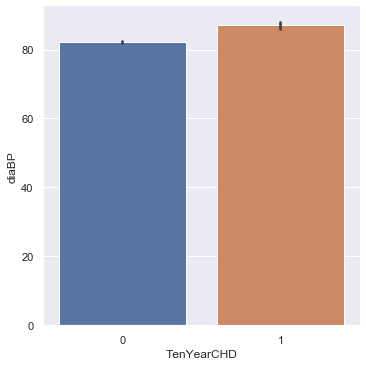

In [17]:
sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=framingham)

Take a look at the relationship between BMI and the ten year risk of CHD

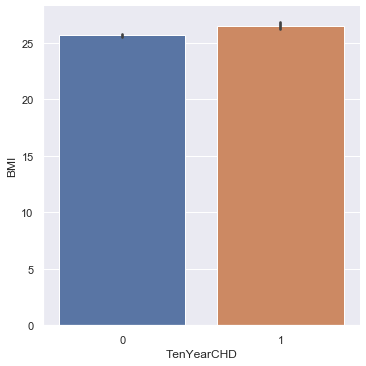

In [17]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=framingham)

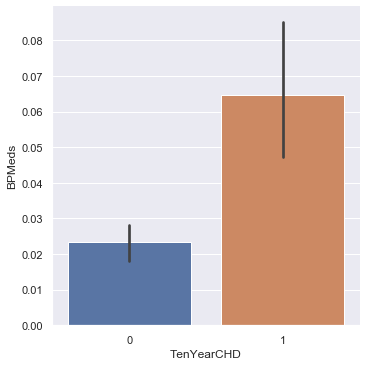

In [18]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=framingham)

In [18]:
# Checking for null values
framingham.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [20]:
# empty values percent across all data
pd.concat([((framingham.isna().sum() / framingham.count()) * 100).round(), framingham.isna().sum()], axis=1).rename(columns={0: "%", 1: "count"})

,%,count
male,0.0,0
age,0.0,0
education,3.0,105
currentSmoker,0.0,0
cigsPerDay,1.0,29
BPMeds,1.0,53
prevalentStroke,0.0,0
prevalentHyp,0.0,0
diabetes,0.0,0
totChol,1.0,50


In [21]:
# Checking for null values
framingham.dropna(subset=['education', 'BPMeds','education', 'BMI', 'heartRate'], inplace=True)

In [22]:
df_mean = framingham.groupby(['male','TenYearCHD'])[['cigsPerDay']].mean().round()
df_mean

cigsPerDay
male TenYearCHD            
0    0                  6.0
     1                  6.0
1    0                 13.0
     1                 15.0

In [23]:
framingham[(framingham['male']==1) & (framingham['TenYearCHD']==0)]['cigsPerDay'].fillna(framingham['cigsPerDay'].mean().round())

0        0.0
2       20.0
8        0.0
9       30.0
12      15.0
        ... 
4225    43.0
4227    20.0
4231     0.0
4234    43.0
4238     0.0
Name: cigsPerDay, Length: 1422, dtype: float64

In [24]:
# Impute missing values in 'cigsPerDay' with mean value grouped by TenYearCHD and male
conditions = []
for index, row in df_mean.iterrows():
    conditions.append((framingham['male']==index[0]) & (framingham['TenYearCHD']==index[1]))

for condition in conditions:
    framingham.loc[condition, 'cigsPerDay'] = framingham[condition]['cigsPerDay'].fillna(framingham['cigsPerDay'].mean().round())
    # explore values with NA
    #df = framingham[condition & (framingham['cigsPerDay'].isna())][['male', 'TenYearCHD', 'cigsPerDay']]
    #print(df.head())

In [25]:
# Another way to impute 'cigsPerDay' empty values
# framingham['cigsPerDay'] = framingham.groupby(["male","TenYearCHD"])["cigsPerDay"].apply(lambda x: x.fillna(x.mean().round()))

In [26]:
framingham['totChol'] = framingham.groupby(["male","TenYearCHD", 'currentSmoker'])["totChol"].apply(lambda x: x.fillna(x.mean().round()))
framingham['glucose'] = framingham.groupby(["male","TenYearCHD", 'currentSmoker'])["glucose"].apply(lambda x: x.fillna(x.mean().round()))

Baseline accuracy: 0.85


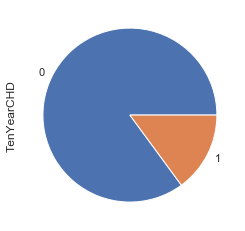

In [27]:
framingham['TenYearCHD'].value_counts().plot.pie()
print('Baseline accuracy: {:.2f}'.format(3457/(3457+606)))

In [28]:
X = framingham.drop('TenYearCHD', axis=1)
y = framingham['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [37]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [38]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

In [40]:
pipepred = pipeline.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pipepred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.89      1223
           1       0.84      0.99      0.91      1197

    accuracy                           0.90      2420
   macro avg       0.91      0.90      0.90      2420
weighted avg       0.91      0.90      0.90      2420

